In [1]:
import optuna
study = optuna.load_study(study_name="Pxx_e", storage="sqlite:///Pxx_e.db")

In [2]:
df = study.trials_dataframe(attrs=("number", "value", "params", "state"))

In [3]:
df

number     value params_activation_0 params_activation_1  \
0        0  0.514502                Tanh             Sigmoid   
1        1  1.177871             Sigmoid                 ELU   
2        2  1.176730                 ELU             Sigmoid   
3        3  0.383038                 ELU                ReLU   
4        4  0.035339                Tanh             Sigmoid   
..     ...       ...                 ...                 ...   
95      95  0.014984                Tanh                ReLU   
96      96  0.049490                Tanh                ReLU   
97      97  0.039940                 ELU                ReLU   
98      98  0.066093                Tanh                Tanh   
99      99  0.056538                Tanh                 ELU   

   params_activation_2 params_activation_3 params_activation_4  \
0              Sigmoid                 ELU                 NaN   
1                 Tanh                Tanh                 ELU   
2                 ReLU                Tanh                 NaN   
3                  ELU                 NaN                 NaN   
4                 Tanh                Tanh                 NaN   
..                 ...                 ...                 ...   
95                ReLU                ReLU                 NaN   
96                ReLU                ReLU             Sigmoid   
97             Sigmoid                ReLU                ReLU   
98                ReLU                 NaN                 NaN   
99                Tanh                ReLU                 NaN   

    params_batch_size  params_dropout_rate  params_lr  \
0                  16             0.483530   0.000061   
1                  32             0.118815   0.002633   
2                 256             0.119588   0.010312   
3                 256             0.456024   0.020567   
4                  32             0.142878   0.000775   
..                ...                  ...        ...   
95                128             0.000057   0.001530   
96                128             0.020797   0.003800   
97                128             0.036890   0.002121   
98                128             0.065357   0.005412   
99                 16             0.022949   0.001208   

    params_num_hidden_layers  params_num_neurons  params_weight_decay  \
0                          4                  20         3.242904e-03   
1                          5                  20         7.422754e-01   
2                          4                  60         3.145249e-01   
3                          3                  60         2.650748e-02   
4                          4                  60         1.994368e-08   
..                       ...                 ...                  ...   
95                         4                 100         1.065173e-04   
96                         5                 100         9.438924e-04   
97                         5                 100         2.029058e-05   
98                         3                  20         4.181253e-04   
99                         4                 100         2.435699e-03   

       state  
0   COMPLETE  
1   COMPLETE  
2   COMPLETE  
3   COMPLETE  
4   COMPLETE  
..       ...  
95  COMPLETE  
96    PRUNED  
97    PRUNED  
98    PRUNED  
99    PRUNED  

[100 rows x 14 columns]

In [4]:
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)
print("Best Trial: ", study.best_trial)
print("Trials: ", study.trials)

Best params:  {'lr': 0.0052507869308574245, 'batch_size': 256, 'weight_decay': 2.92371107419934e-05, 'num_hidden_layers': 3, 'num_neurons': 100, 'dropout_rate': 0.012338409961581618, 'activation_0': 'Tanh', 'activation_1': 'ReLU', 'activation_2': 'Tanh'}
Best value:  0.011982526009281477
Best Trial:  FrozenTrial(number=73, state=TrialState.COMPLETE, values=[0.011982526009281477], datetime_start=datetime.datetime(2024, 5, 2, 0, 22, 2, 660216), datetime_complete=datetime.datetime(2024, 5, 2, 0, 23, 35, 816538), params={'lr': 0.0052507869308574245, 'batch_size': 256, 'weight_decay': 2.92371107419934e-05, 'num_hidden_layers': 3, 'num_neurons': 100, 'dropout_rate': 0.012338409961581618, 'activation_0': 'Tanh', 'activation_1': 'ReLU', 'activation_2': 'Tanh'}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.030340230790898204, 1: 0.023334322109197576, 2: 0.02059657972616454, 3: 0.02015711374891301, 4: 0.020480784121900797, 5: 0.0156256901488329, 6: 0.022968019203593332, 7: 0.0196808

In [5]:
optuna.visualization.plot_optimization_history(study)

In [6]:
optuna.visualization.plot_param_importances(study)

In [7]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

In [9]:
optuna.visualization.plot_contour(study, params=["num_neurons", "weight_decay"])

In [10]:
optuna.visualization.plot_contour(study, params=["lr", "batch_size"])

In [12]:
import sys
sys.path.append('/lustre1/project/stg_00032/georgem/closure/')
import src.trainers as tr
trainer = tr.Trainer(work_dir='./')

INFO:src.trainers: 
INFO:src.trainers:========Logging to /lustre1/project/stg_00032/georgem/closure/models/exp/exp4//training.log===========
INFO:src.trainers: 
INFO:src.datasets: This is train set
INFO:src.datasets:Loaded self.features_mean, self.features_std from /lustre1/project/stg_00032/georgem/closure/models/exp/exp4//X_train.csv_None.pkl
INFO:src.datasets:Normalization applied to features
INFO:src.datasets:Prescaling <ufunc 'log'> applied to targets
INFO:src.datasets:Prescaling <ufunc 'log'> applied to targets
INFO:src.datasets:Prescaling <ufunc 'log'> applied to targets
INFO:src.datasets:Loaded self.targets_mean, self.targets_std from /lustre1/project/stg_00032/georgem/closure/models/exp/exp4//y_train.csv_[<ufunc 'log'>, <ufunc 'log'>, <ufunc 'log'>, None, None, None].pkl
INFO:src.datasets:Normalization applied to targets
INFO:src.datasets:477400, len(self.targets) = 477400 samples before subsampling
INFO:src.datasets:95480, len(self.targets) = 95480 samples after subsampling
I

In [16]:
trainer.load_run(f'./Pxx_e/{study.best_trial.number}')

INFO:src.trainers:==========Config file /lustre1/project/stg_00032/georgem/closure/models/exp/exp4/./Pxx_e/73/config.json found========
INFO:src.models:Initializing MLP model.
INFO:src.models:Optimization criterion MSELoss()
INFO:src.models:Tracking metrics [L1Loss()]
INFO:src.trainers:Successfully parsed the MLP class
INFO:src.trainers:Creating object: MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=100, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.012338409961581618, inplace=False)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.012338409961581618, inplace=False)
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): Tanh()
    (8): Dropout(p=0.012338409961581618, inplace=False)
    (9): Linear(in_features=100, out_features=1, bias=True)
    (10): Dropout(p=0.012338409961581618, inplace=False)
  )
  (criterion): MSELoss()
)

Device w

In [18]:
import matplotlib.pyplot as plt
for key, val_loss in trainer.model.val_loss_.items():
    plt.plot(val_loss, label=f'val {key}')
for key, val_loss in trainer.model.train_loss_.items():
    plt.plot(val_loss, label=f'train {key}', linestyle=':')
plt.ylim(0, 2e-1)
plt.legend()
plt.show()

In [19]:
prediction = trainer.model.predict(trainer.test_dataset.features) 
ground_truth = trainer.test_dataset.targets[:,trainer.val_loader.target_channels]
trainer.model._compute_loss(ground_truth,prediction,trainer.model.criterion)

tensor(0.4222)

invfunc = <ufunc 'exp'>


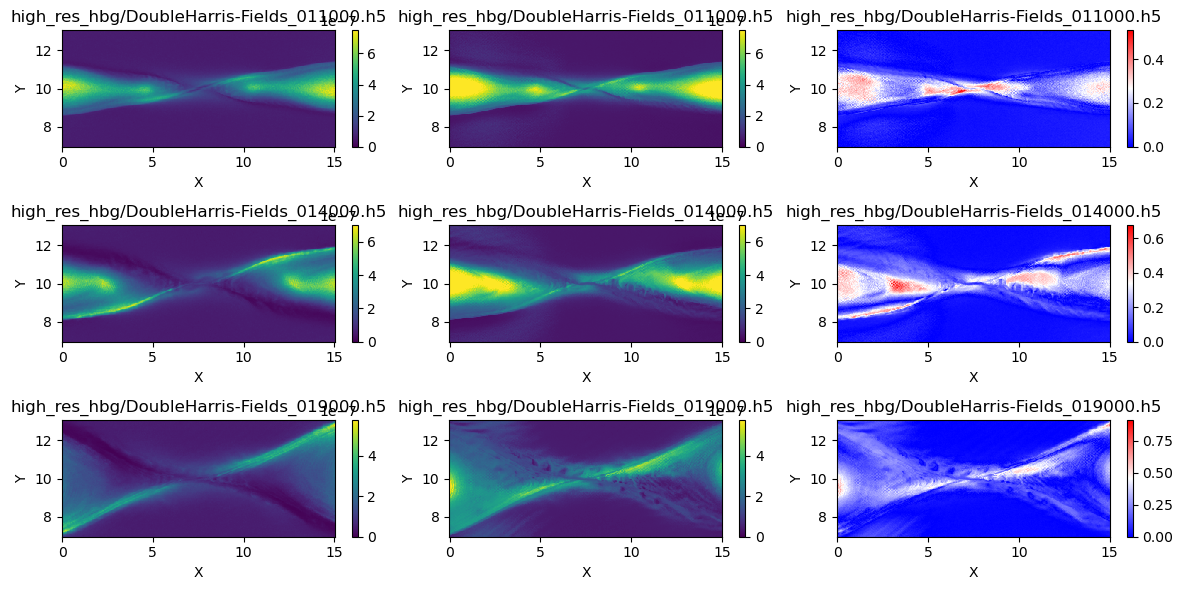

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import importlib as imp 
import src.read_pic as rp
import numpy as np
channel = 0
func = [trainer.train_dataset.prescaler_targets[i] for i in trainer.train_loader.target_channels][channel]
if func.__name__ == 'log':
    invfunc = np.exp
elif func.__name__ == 'arcsinh':
    invfunc = np.sinh
elif func == None:
    invfunc = lambda a: a
print(f"{invfunc = }")
X, Y = rp.build_XY(trainer.dataset_kwargs['data_folder'],choose_x=trainer.dataset_kwargs['read_features_targets_kwargs']['choose_x'],
            choose_y = trainer.dataset_kwargs['read_features_targets_kwargs']['choose_y'])
prediction_reshaped = invfunc(prediction[...,channel].numpy()*trainer.test_dataset.targets_std[trainer.train_loader.target_channels]+
                       trainer.test_dataset.targets_mean[trainer.train_loader.target_channels]).reshape(trainer.test_dataset.targets_shape[:-1]+(1,))
ground_truth_reshaped = invfunc(ground_truth[...,channel].numpy()*trainer.test_dataset.targets_std[trainer.train_loader.target_channels]+
                         trainer.test_dataset.targets_mean[trainer.train_loader.target_channels]).reshape(trainer.test_dataset.targets_shape[:-1]+(1,))
# TODO: fix the treatment of the channels
# Create a figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 6))

# Iterate over the panels
for i in range(3):
    error = np.abs(ground_truth_reshaped[i,...,0] - prediction_reshaped[i,...,0])/(ground_truth_reshaped[i,...,0].max())
    vmax = ground_truth_reshaped[i,...,0].max()
    vmax = [vmax, vmax, np.max(error)]
    vmin = 0 #-ground_truth_reshaped[i,...,0].max()
    vmin = [vmin, vmin, 0]
    cmaps = ['viridis', 'viridis', 'bwr']
    for j, data in enumerate([ground_truth_reshaped[i,...,0], prediction_reshaped[i,...,0], error ]):
        im = axs[i,j].pcolormesh(X, Y, data, vmax=vmax[j], vmin=vmin[j], cmap=cmaps[j])
        axs[i,j].set_title(trainer.test_dataset.dataframe['filenames'].iloc[i])
        axs[i,j].set_xlabel('X')
        axs[i,j].set_ylabel('Y')
        fig.colorbar(im, ax=axs[i,j])
# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

### Re-running with more data

In [36]:
import copy
import json
import shutil
import os
config2 = copy.deepcopy(trainer.config)
config2['dataset_kwargs']['subsample_rate'] = None # so that we use all the data
re_best_trial = f'./Pxx_e/{study.best_trial.number}_/'
if os.path.exists(re_best_trial):
    shutil.rmtree(re_best_trial)
os.mkdir(re_best_trial)
config_file2 = f'{re_best_trial}config.json'
with open(config_file2, 'w') as f:
    f.write(json.dumps(config2, indent=4))
trainer2 = tr.Trainer(work_dir=re_best_trial)
trainer2.fit()

INFO:src.trainers: 
INFO:src.trainers:========Logging to /lustre1/project/stg_00032/georgem/closure/models/exp/exp4//training.log===========
INFO:src.trainers: 
INFO:src.datasets: This is train set
INFO:src.datasets:Loaded self.features_mean, self.features_std from /lustre1/project/stg_00032/georgem/closure/models/exp/exp4//X_train.csv_None.pkl
INFO:src.datasets:Normalization applied to features
INFO:src.datasets:Prescaling <ufunc 'log'> applied to targets
INFO:src.datasets:Prescaling <ufunc 'log'> applied to targets
INFO:src.datasets:Prescaling <ufunc 'log'> applied to targets
INFO:src.datasets:Loaded self.targets_mean, self.targets_std from /lustre1/project/stg_00032/georgem/closure/models/exp/exp4//y_train.csv_[<ufunc 'log'>, <ufunc 'log'>, <ufunc 'log'>, None, None, None].pkl
INFO:src.datasets:Normalization applied to targets
INFO:src.datasets: This is val set
INFO:src.datasets:dataset provided with scaler features
INFO:src.datasets:Normalization applied to features
INFO:src.datase

0.006972028069805859

In [37]:
prediction = trainer2.model.predict(trainer2.test_dataset.features) 
ground_truth = trainer2.test_dataset.targets[:,trainer2.val_loader.target_channels]
trainer2.model._compute_loss(ground_truth,prediction,trainer2.model.criterion)

tensor(0.1933)

invfunc = <ufunc 'exp'>


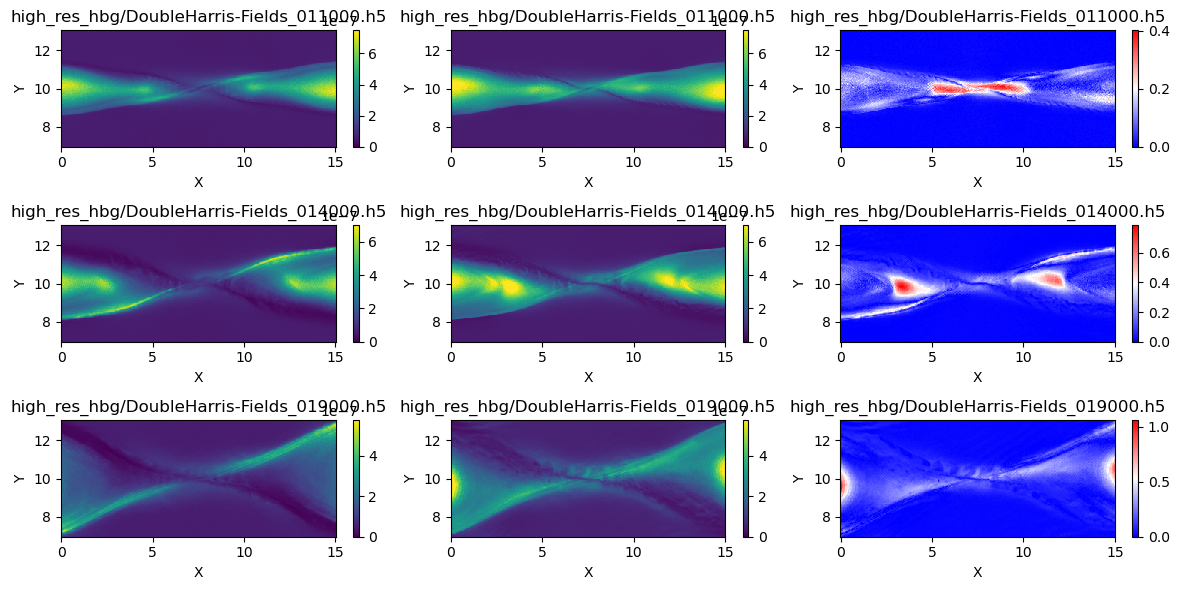

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import importlib as imp 
import src.read_pic as rp
import numpy as np
channel = 0
func = [trainer.train_dataset.prescaler_targets[i] for i in trainer.train_loader.target_channels][channel]
if func.__name__ == 'log':
    invfunc = np.exp
elif func.__name__ == 'arcsinh':
    invfunc = np.sinh
elif func == None:
    invfunc = lambda a: a
print(f"{invfunc = }")
X, Y = rp.build_XY(trainer.dataset_kwargs['data_folder'],choose_x=trainer.dataset_kwargs['read_features_targets_kwargs']['choose_x'],
            choose_y = trainer.dataset_kwargs['read_features_targets_kwargs']['choose_y'])
prediction_reshaped = invfunc(prediction[...,channel].numpy()*trainer.test_dataset.targets_std[trainer.train_loader.target_channels]+
                       trainer.test_dataset.targets_mean[trainer.train_loader.target_channels]).reshape(trainer.test_dataset.targets_shape[:-1]+(1,))
ground_truth_reshaped = invfunc(ground_truth[...,channel].numpy()*trainer.test_dataset.targets_std[trainer.train_loader.target_channels]+
                         trainer.test_dataset.targets_mean[trainer.train_loader.target_channels]).reshape(trainer.test_dataset.targets_shape[:-1]+(1,))
# TODO: fix the treatment of the channels
# Create a figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 6))

# Iterate over the panels
for i in range(3):
    error = np.abs(ground_truth_reshaped[i,...,0] - prediction_reshaped[i,...,0])/(ground_truth_reshaped[i,...,0].max())
    vmax = ground_truth_reshaped[i,...,0].max()
    vmax = [vmax, vmax, np.max(error)]
    vmin = 0 #-ground_truth_reshaped[i,...,0].max()
    vmin = [vmin, vmin, 0]
    cmaps = ['viridis', 'viridis', 'bwr']
    for j, data in enumerate([ground_truth_reshaped[i,...,0], prediction_reshaped[i,...,0], error ]):
        im = axs[i,j].pcolormesh(X, Y, data, vmax=vmax[j], vmin=vmin[j], cmap=cmaps[j])
        axs[i,j].set_title(trainer.test_dataset.dataframe['filenames'].iloc[i])
        axs[i,j].set_xlabel('X')
        axs[i,j].set_ylabel('Y')
        fig.colorbar(im, ax=axs[i,j])
# Adjust the layout of the subplots
plt.tight_layout()
plt.show()